In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%pip install tueplots
from tueplots import bundles

Note: you may need to restart the kernel to use updated packages.


In [18]:
results_2019 = pd.read_csv("../data/bac-results-2019.csv", index_col=0)
results_2020 = pd.read_csv("../data/bac-results-2020.csv", index_col=0)
results_2021 = pd.read_csv("../data/bac-results-2021.csv", index_col=0)
results_2019.fillna('', inplace=True)
results_2020.fillna('', inplace=True)
results_2021.fillna('', inplace=True)
print()

C:\Users\cseke\anaconda3\envs\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


[0.79363081 0.02001105]


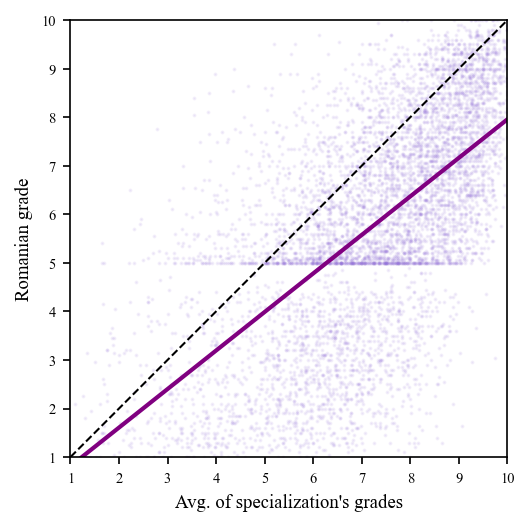

In [26]:
# Let's plot the minorities' Romanian grades and the average of their electory and mandatory subjects.
# Predict the Romanian grade from that average.

# Separate the minorities. Create column for average.
romanian_plus_results = results_2021[(results_2021['mother_tongue'] != '') & (results_2021['romanian_written_final'] >= 1)]
romanian_plus_results_valid = romanian_plus_results[(romanian_plus_results['mandatory_subject_written_final'] >= 1.0) & (romanian_plus_results['elective_subject_written_final'] >= 1.0)].copy()
romanian_plus_results_valid.loc[:, 'mandatory_elective_average'] = romanian_plus_results_valid[['mandatory_subject_written_final', 'elective_subject_written_final']].mean(axis=1)

dot_size_minority = 30
dot_size_ro = dot_size_minority * len(romanian_plus_results_valid)

x_minority = romanian_plus_results_valid['mandatory_elective_average']
y_minority = romanian_plus_results_valid['romanian_written_final']

linear_line_minority = np.polyfit(x_minority, y_minority, 1)
print(linear_line_minority)
end_points_x = [1, 10]
end_points_y = [linear_line_minority[0] * x + linear_line_minority[1] for x in end_points_x]


with plt.rc_context(bundles.neurips2021(usetex=False, family='serif')):
    fig, ax = plt.subplots(dpi=150)

    ax.scatter(x_minority, y_minority, marker='.', alpha=0.1, color='mediumpurple', s=3)
    
    plt.gca().set_aspect('equal', adjustable='box')
    ax.set_xlim(1, 10)
    ax.set_ylim(1, 10)
    ax.plot(end_points_x, end_points_y, linewidth = 2, color='purple')
    ax.plot(end_points_x, end_points_x, '--', linewidth = 1, color='black')

    ax.set_xlabel("Avg. of specialization's grades")
    ax.set_ylabel("Romanian grade")

    plt.show()
    fig.savefig('../doc/plots/exp3_linear_reg_min.png', bbox_inches='tight')


[0.65135129 2.5625817 ]


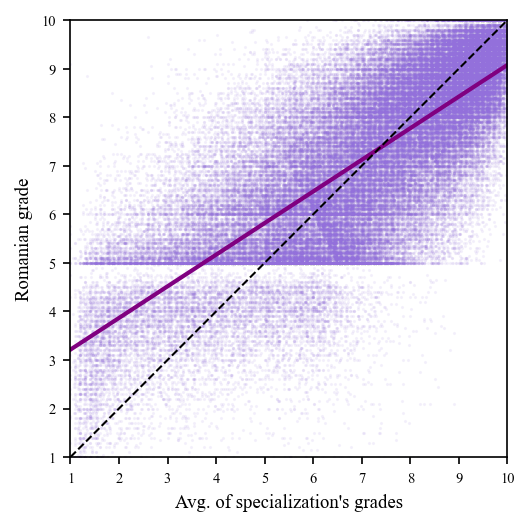

In [27]:
# Same for the Romanian students.

romanian_only_results = results_2021[(results_2021['mother_tongue'] == '') & (results_2021['romanian_written_final'] >= 1)]
romanian_only_results_valid = romanian_only_results[(romanian_only_results['mandatory_subject_written_final'] >= 1.0) & (romanian_only_results['elective_subject_written_final'] >= 1.0)].copy()
romanian_only_results_valid.loc[:, 'mandatory_elective_average'] = romanian_only_results_valid[['mandatory_subject_written_final', 'elective_subject_written_final']].mean(axis=1)

dot_size_ro /= len(romanian_only_results_valid)

x_ro = romanian_only_results_valid['mandatory_elective_average']
y_ro = romanian_only_results_valid['romanian_written_final']

linear_line_ro = np.polyfit(x_ro, y_ro, 1)
print(linear_line_ro)
end_points_x = [1, 10]
end_points_y = [linear_line_ro[0] * x + linear_line_ro[1] for x in end_points_x]

with plt.rc_context(bundles.neurips2021(usetex=False, family='serif')):
    fig, ax = plt.subplots(dpi=150)

    ax.scatter(x_ro, y_ro, marker='.', alpha=0.1, color='mediumpurple', s=1)

    plt.gca().set_aspect('equal', adjustable='box')
    ax.set_xlim(1, 10)
    ax.set_ylim(1, 10)
    ax.plot(end_points_x, end_points_y, linewidth = 2, color='purple')
    ax.plot(end_points_x, end_points_x, '--', linewidth = 1, color='black')

    ax.set_xlabel("Avg. of specialization's grades")
    ax.set_ylabel("Romanian grade")

    plt.show()
    fig.savefig('../doc/plots/exp3_linear_reg_rom.png', bbox_inches='tight')